# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1. Open the data file and study the general information. 

In [2]:
df = pd.read_csv('vehicles_us.csv')

In [3]:
#how many cars listed?
original_len = len(df)
original_len

51525

In [4]:
df.head(3)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,6/23/2018,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,10/19/2018,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2/7/2019,79


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [6]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [7]:
#What is in the is_4wd column?
df['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

In [8]:
#nulls per column
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [9]:
df['model_year'].value_counts()

2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1954.0       1
1949.0       1
1948.0       1
1936.0       1
1929.0       1
Name: model_year, Length: 68, dtype: int64

In [10]:
#Are any of these numbers off? 

series = df['model_year']
print('max', series.max())
print('min', series.min())
print('median', series.median())

max 2019.0
min 1908.0
median 2011.0


In [11]:
df['model'].value_counts()

ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64

In [12]:
df['model'].nunique()

100

Although we can see correlation of model (as is) with 100 different types it seems the company that made the model is consistently the first element. That might lead to less distinct values and more interesting connections

In [13]:
df['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [14]:
df['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [15]:
df['fuel'].value_counts()

gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64

In [16]:
df['odometer'].value_counts()

0.0         185
140000.0    183
120000.0    179
130000.0    178
160000.0    167
           ... 
51595.0       1
111381.0      1
155940.0      1
43402.0       1
74063.0       1
Name: odometer, Length: 17762, dtype: int64

In [17]:
#Are any of these numbers off? 

series = df['odometer']
print('max', series.max())
print('min', series.min())
print('median', series.median())

max 990000.0
min 0.0
median 113000.0


In [18]:
max_odometer = df['odometer'].max()
df.loc[df['odometer']== max_odometer]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
17869,59900,1964.0,chevrolet corvette,like new,NaN,gas,990000.0,automatic,convertible,red,NaN,6/17/2018,28
40729,4700,2013.0,chevrolet cruze,good,6.0,gas,990000.0,automatic,sedan,black,NaN,5/2/2018,4


Two important things here
* Do a closer look at 0 odometer values
* As it is apparently [very rare](https://www.motorbiscuit.com/going-the-distance-7-cars-that-have-gone-1m-miles/) for ANY car to reach 1 million miles, let alone one from 2013. Rather than assume this is a mistake, I am leaning to assume this **odometer is in killometers** rather than miles which would make the maximum values here more likely. For a car to reach 990K killometers (about 600k miles) is still a feat as per [this article](https://www.nytimes.com/2007/06/03/automobiles/03MILES.html) but it is possible with "extraordinary care and maintenance".

In [19]:
df['transmission'].value_counts()

automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64

In [20]:
df['type'].value_counts()

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

In [21]:
df['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [22]:
df['days_listed'].value_counts()

18     959
24     950
22     945
19     941
20     934
      ... 
263      1
182      1
261      1
217      1
223      1
Name: days_listed, Length: 227, dtype: int64

In [23]:
#Are any of these numbers off? 

series = df['days_listed']
print('max', series.max())
print('min', series.min())
print('median', series.median())

max 271
min 0
median 33.0


Lastly let's check out target variable Price

In [24]:
df['price'].value_counts()

1         798
6995      719
5995      655
4995      624
3500      620
         ... 
49988       1
36600       1
300000      1
39873       1
11762       1
Name: price, Length: 3443, dtype: int64

With the price of 1 in the top it seems clear there are some extreme values on the lower end that we should take a look at.

In [25]:
#Let's look at some basic numbers:

series = df['price']
print('max', series.max())
print('min', series.min())
print('median', series.median())
print('average', series.mean())

max 375000
min 1
median 9000.0
average 12132.464919941776


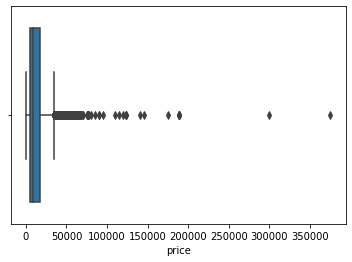

In [26]:
sns.boxplot(x=df['price'])

As average is much higher than median, we know there are extreme values in the top end of price too. This blox plot shows those records. The next step will be to choose a cutoff.

### Conclusion

After a quick look at the data, I'm happy to see the variables are for the most part self-explanatory and logical. We have had over 51K cars listed so far. For preprocessign, these are some areas of concern for **next steps**:
* Manage nulls
* Update float fields to integers when appropriate
* update date_posted field to date time so that we can do further analysis on post timing
* Consider how to handle is_4wd. Nulls and value of 1 lead me to assume 1 means it is a 4 wheel drive and null means it is is not. With this assumption, we should update the nulls and data type for this variable
* If I use model in our analysis, there might be more interesting correlations if we extract the first element of each string which seems to be the manufacturer. Further testing needs to be done to confirm.
* Although it seems the database is all lower case, it might benefitial to turn all the strings into lower case so that similar values with different cases are still aggregated when expected
* Take a closer look at cars with odometer value of 0
* Note "type" not objective, some subjective (e.g. truck vs pickup)
* most likely out of scope, consider quality checking days_posted by discovering the cutoff date used and calculating it
* I am assuming the odometer variable is in killometers rather than miles based on  the likelihood of its extreme values
* Price has outliers that must be removed.

### Step 2. Data preprocessing

In [27]:
#strings to lower case
df['model'] = df['model'].str.lower()
df['fuel'] = df['fuel'].str.lower()
df['transmission'] = df['transmission'].str.lower()
df['type'] = df['type'].str.lower()
df['paint_color'] = df['paint_color'].str.lower()
df['condition'] = df['condition'].str.lower()

Just in case, all string fields were made into lower case

In [28]:
# correcting data type of date_posted field
df['date_posted'] = pd.to_datetime(df['date_posted'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


In [30]:
#Date range of data
print('Date Range >> ', df['date_posted'].min(),' - ', df['date_posted'].max())

Date Range >>  2018-05-01 00:00:00  -  2019-04-19 00:00:00


The variable 'date_posted' was corrected from data type object to date time. Now we can tell data  includes postings from **May 1st, 2018 to April 19, 2019**. Almost a full year.

In [31]:
#new columns for year, month, and day of week of posting, now that date_posted is the correct data type

df['year_posted'] = df['date_posted'].dt.year
df['month_posted'] = df['date_posted'].dt.month
df['dow_posted'] = df['date_posted'].dt.weekday #note 0 is Monday

def dayname(weekday):
    if weekday == 0:
        return "monday"
    elif weekday == 1:
        return "tuesday"
    elif weekday == 2:
        return "wednesday"
    elif weekday == 3:
        return "thursday"
    elif weekday == 4:
        return "friday"
    elif weekday == 5:
        return "saturday"
    elif weekday == 6:
        return "sunday"
    
df['dow_posted'] = df['dow_posted'].apply(dayname)

In [32]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,dow_posted
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,1.0,2018-06-23,19,2018,6,saturday
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2018,10,friday
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,2019,2,thursday
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,2019,3,friday
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,2019,4,tuesday


As date_posted is now correctly a date time we are able to do date functions. I have opted to add 3 columns relating to the year_posted, month posted, and day of week posted. These are potential areas of exploration

In [33]:
#% of records null per variable
df.isna().sum() / len(df)

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.503697
date_posted     0.000000
days_listed     0.000000
year_posted     0.000000
month_posted    0.000000
dow_posted      0.000000
dtype: float64

There are 5 columns with **nulls**. Below we will look at each one

In [34]:
#% of records where is4wd that is null
df['is_4wd'].isna().sum() / len(df)

0.5036972343522562

In [35]:
df['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

The 'is_4wd' has 50% of the records null. We can't just drop 50% of the data! With a closer look I discovered that the only value represented is 1.

In [36]:
#is4wd
df['is_4wd'] = df['is_4wd'].fillna(0)

In [37]:
df['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

In [38]:
df['is_4wd'] = df['is_4wd'].astype('bool')

In [39]:
# confirm is4d boolean and no nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
year_posted     51525 non-null int64
month_posted    51525 non-null int64
dow_posted      51525 non-null object
dtypes: bool(1), datetime64[ns](1), float64(3), int64(4), object(7)
memory usage: 5.9+ MB


As mentioned before, I found out that the only two values in the series for 'is_4wd' were 1 or NaN. Hence, I'm assuming that when true it is 1 and the NaN represents False. I have replaced all the nulls with 0 and changed the data type to boolean. 

In [40]:
#% of records where is4wd that is null
df['paint_color'].isna().sum() / len(df)

0.17985443959243086

Paint color is empty in 18% of the records. It wouldnt make sense to drop this much data. Some other way of solving is needed. I will look into understanding when/why this field is empty to make a decision

In [41]:
df['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [42]:
#locate records where paint is empty
paint_color_empty = df[df['paint_color'].isnull()]

In [43]:
#perhaps certain time frames dont include this. remember only 1 year of data. no overlapping months
paint_color_empty['month_posted'].value_counts() / df['month_posted'].value_counts()

1     0.184187
2     0.173642
3     0.171529
4     0.178204
5     0.187653
6     0.179080
7     0.180720
8     0.179911
9     0.183962
10    0.174025
11    0.184198
12    0.180324
Name: month_posted, dtype: float64

In [44]:
# leap - maybe a glitch on certain days
paint_color_empty['dow_posted'].value_counts() / df['dow_posted'].value_counts()

friday       0.182847
monday       0.185448
saturday     0.178166
sunday       0.178902
thursday     0.179893
tuesday      0.171899
wednesday    0.181806
Name: dow_posted, dtype: float64

These paint color field being empty is not related to when a posting was made

In [45]:
paint_color_empty['model_year'].value_counts() / df['model_year'].value_counts().head(20)

1958.0         NaN
1960.0         NaN
1962.0         NaN
1963.0         NaN
1965.0         NaN
1966.0         NaN
1967.0         NaN
1968.0         NaN
1969.0         NaN
1970.0         NaN
1971.0         NaN
1972.0         NaN
1973.0         NaN
1975.0         NaN
1976.0         NaN
1977.0         NaN
1978.0         NaN
1980.0         NaN
1981.0         NaN
1982.0         NaN
1984.0         NaN
1985.0         NaN
1986.0         NaN
1987.0         NaN
1988.0         NaN
1989.0         NaN
1990.0         NaN
1991.0         NaN
1992.0         NaN
1993.0         NaN
1994.0         NaN
1995.0         NaN
1996.0         NaN
1997.0         NaN
1998.0         NaN
1999.0    0.157509
2000.0    0.165021
2001.0    0.160947
2002.0    0.190935
2003.0    0.194850
2004.0    0.165505
2005.0    0.174815
2006.0    0.173232
2007.0    0.182369
2008.0    0.165185
2009.0    0.191919
2010.0    0.179859
2011.0    0.177185
2012.0    0.174452
2013.0    0.190194
2014.0    0.186485
2015.0    0.184472
2016.0    0.

This is slightly more interesting. Newer cars (starting 1999) are more likely to have this field empty

In [46]:
df['paint_color'] = df['paint_color'].fillna('unknown')

In [47]:
df['paint_color'].value_counts()

white      10029
unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64

We may not even find a correlation between paint color and price so for now, I will go ahead and just replace the null with "unknown". 

In [48]:
#% of records where  that is null
df['model_year'].isna().sum() / len(df)

0.07023774866569626

ok, so only 7% of the records do not have the model year. I expect this should impact price and hence will be dropping these records

In [49]:
df = df.dropna(subset=['model_year'])

In [50]:
len(df) / original_len

0.9297622513343038

We dropped records where model year is empty and still kept about 93% of our original dataset as model year is expected be crucial. I'm not option to replace it because I assume even 1 year older or newer could have an impact on price.

In [51]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,dow_posted
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,unknown,True,2018-06-23,19,2018,6,saturday
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019,2,thursday
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,False,2019-03-22,9,2019,3,friday
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019,4,tuesday
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2018,6,wednesday


In [52]:
#% of records where cylinders is null
df['cylinders'].isna().sum() / len(df)

0.10222101615664009

Despite droppping all records with model_year null, we still have 10% of the remaning data with cylinders data missing. If we drop anoter 10% we would have lost almost 20% of the data. It is better to fill it.

In [53]:
#median
df['cylinders'].median()

6.0

In [54]:
df['cylinders'].mean()

6.126275895742752

In [55]:
q25 = df['cylinders'].quantile(0.25)
q75 = df['cylinders'].quantile(0.75)

print('Q1: ',q25)
print('Q3: ',q75)

Q1:  4.0
Q3:  8.0


In [56]:
# filled nulls with median
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].median())

In [57]:
#number of records where cylinders is empty (should be 0)
df['cylinders'].isna().sum()

0

To find out what to replace the null cylinders values, I looked into the median and learned 50% of the records are either above or below 6. Average is actually right around median too so this indicates there arent any major outliers and the center of the data is representative. I also learned via calculating Q1 and Q3 that the middle 50% of the data spans cylinders from 4 to 8 so median which falls right in the middle seems like a fair representation and was used to full in the nulls here.

In [58]:
#% of records where odometer that is null
df['odometer'].isna().sum() / len(df)

0.15327933870496388

Despite dropping the records with empty model year before, we still have 15% of the data without values for odometer. As this is a pretty wide range, I dont believe that slight variations should have an effect on price so I will be looking fill it

In [59]:
#median
df['odometer'].median()

113000.0

In [60]:
df['odometer'].mean()

115425.44409930232

In [61]:
q25 = df['odometer'].quantile(0.25)
q75 = df['odometer'].quantile(0.75)

print('Q1: ',q25)
print('Q3: ',q75)

Q1:  70000.0
Q3:  155000.0


In [62]:
# filled nulls with median
df['odometer'] = df['odometer'].fillna(df['odometer'].median())

In [63]:
#number of records where odometer is empty (should be 0)
df['odometer'].isna().sum()

0

With odometer, we followed the same methodolgy as cylinders and replaced nulls with median

In [64]:
#% of nulls per column
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
year_posted     0
month_posted    0
dow_posted      0
dtype: int64

In [65]:
# data kept
len(df) / original_len

0.9297622513343038

We have handled all nulls and still kept almost 93% of the data

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 16 columns):
price           47906 non-null int64
model_year      47906 non-null float64
model           47906 non-null object
condition       47906 non-null object
cylinders       47906 non-null float64
fuel            47906 non-null object
odometer        47906 non-null float64
transmission    47906 non-null object
type            47906 non-null object
paint_color     47906 non-null object
is_4wd          47906 non-null bool
date_posted     47906 non-null datetime64[ns]
days_listed     47906 non-null int64
year_posted     47906 non-null int64
month_posted    47906 non-null int64
dow_posted      47906 non-null object
dtypes: bool(1), datetime64[ns](1), float64(3), int64(4), object(7)
memory usage: 5.9+ MB


In [67]:
#change floats to inteegers (now that nulls are removed)

df['model_year'] = df['model_year'].astype(np.int64)
df['cylinders'] = df['cylinders'].astype(np.int64)
df['odometer'] = df['odometer'].astype(np.int64)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 16 columns):
price           47906 non-null int64
model_year      47906 non-null int64
model           47906 non-null object
condition       47906 non-null object
cylinders       47906 non-null int64
fuel            47906 non-null object
odometer        47906 non-null int64
transmission    47906 non-null object
type            47906 non-null object
paint_color     47906 non-null object
is_4wd          47906 non-null bool
date_posted     47906 non-null datetime64[ns]
days_listed     47906 non-null int64
year_posted     47906 non-null int64
month_posted    47906 non-null int64
dow_posted      47906 non-null object
dtypes: bool(1), datetime64[ns](1), int64(7), object(7)
memory usage: 5.9+ MB


Which vehicles have 0 for odometer

In [69]:
odometer_0 = df.loc[df['odometer']==0]
odometer_0['condition'].value_counts()

good         94
excellent    66
fair          6
like new      4
salvage       2
Name: condition, dtype: int64

In [70]:
# records with 0 for odometer value
len(odometer_0) / len(df)

0.003590364463741494

Records with 0 odometer values but various conditions levels could potentially have errors but they are such a small portion of the dataset (less than 1) that I will leave them.

In [71]:
len(df) / original_len

0.9297622513343038

In [72]:
1-(len(df) / original_len)

0.07023774866569621

Price had outliers in the top that were removed. Now the histogram looks much better. It seems to have values that are too low that are assumingly erroneous. However, as we don't have enough information to determine this we will leave them for now. 

### Conclusion

We have completed preprocessing. During this process, we **removed about 7% of the original dataset** and hence still have about 93% of the original dataset. Moving forward the data does not have nulls and each variable has the correct data type. 

### Step 3. Make calculations and add them to the table

Note - day of week, month, and year added in Preprocessing step

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 16 columns):
price           47906 non-null int64
model_year      47906 non-null int64
model           47906 non-null object
condition       47906 non-null object
cylinders       47906 non-null int64
fuel            47906 non-null object
odometer        47906 non-null int64
transmission    47906 non-null object
type            47906 non-null object
paint_color     47906 non-null object
is_4wd          47906 non-null bool
date_posted     47906 non-null datetime64[ns]
days_listed     47906 non-null int64
year_posted     47906 non-null int64
month_posted    47906 non-null int64
dow_posted      47906 non-null object
dtypes: bool(1), datetime64[ns](1), int64(7), object(7)
memory usage: 5.9+ MB


In [74]:
df['vehicle_age'] = df['year_posted'] - df['model_year']

In [75]:
df.head(3)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,dow_posted,vehicle_age
0,9400,2011,bmw x5,good,6,gas,145000,automatic,suv,unknown,True,2018-06-23,19,2018,6,saturday,7
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,thursday,6
3,1500,2003,ford f-150,fair,8,gas,113000,automatic,pickup,unknown,False,2019-03-22,9,2019,3,friday,16


In [76]:
df['avg_miles_per_year'] = df['odometer'] / df['vehicle_age']

In [77]:
df.head(3)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,dow_posted,vehicle_age,avg_miles_per_year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,suv,unknown,True,2018-06-23,19,2018,6,saturday,7,20714.285714
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,thursday,6,18333.333333
3,1500,2003,ford f-150,fair,8,gas,113000,automatic,pickup,unknown,False,2019-03-22,9,2019,3,friday,16,7062.500000


In [78]:
df['avg_miles_per_year'].min()

0.0

In [79]:
df['avg_miles_per_year'].max()

inf

In [80]:
# why inf. Maybe there are vehicles with 0 age and we asked Python to divide by 0
df['vehicle_age'].min()

0

In [81]:
#redo column with exception for vehicles with 0 age
df['avg_miles_per_year'] = np.where(df['vehicle_age'] != 0, df['odometer'] / df['vehicle_age'], df['odometer'])

In [82]:
df['avg_miles_per_year'].max()

373200.0

In [83]:
df['manufacturer'] = df['model'].str.split().str[0]

In [84]:
df.head(3)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,dow_posted,vehicle_age,avg_miles_per_year,manufacturer
0,9400,2011,bmw x5,good,6,gas,145000,automatic,suv,unknown,True,2018-06-23,19,2018,6,saturday,7,20714.285714,bmw
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,thursday,6,18333.333333,hyundai
3,1500,2003,ford f-150,fair,8,gas,113000,automatic,pickup,unknown,False,2019-03-22,9,2019,3,friday,16,7062.500000,ford


In [85]:
df['manufacturer'].value_counts()

ford             11790
chevrolet         9885
toyota            5059
honda             3244
ram               3087
jeep              3041
nissan            2969
gmc               2207
subaru            1178
dodge             1158
hyundai           1099
volkswagen         809
chrysler           780
kia                544
cadillac           295
buick              257
bmw                246
acura              224
mercedes-benz       34
Name: manufacturer, dtype: int64

In [86]:
df['condition'].value_counts()

excellent    23074
good         18695
like new      4409
fair          1492
new            133
salvage        103
Name: condition, dtype: int64

In [87]:
def condition_scale(condition):
    if condition == 'new':
        return 5
    elif condition == 'like new':
        return 4
    elif condition == 'excellent':
        return 3
    elif condition == 'good':
        return 2
    elif condition == 'fair':
        return 1
    elif condition == 'salvage':
        return 0
    else: 
        pass
    
df['condition'] = df['condition'].apply(condition_scale)

In [88]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,dow_posted,vehicle_age,avg_miles_per_year,manufacturer
0,9400,2011,bmw x5,2,6,gas,145000,automatic,suv,unknown,True,2018-06-23,19,2018,6,saturday,7,20714.285714,bmw
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,thursday,6,18333.333333,hyundai
3,1500,2003,ford f-150,1,8,gas,113000,automatic,pickup,unknown,False,2019-03-22,9,2019,3,friday,16,7062.500000,ford
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,tuesday,2,40451.500000,chrysler
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2018,6,wednesday,4,14488.500000,chrysler


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 19 columns):
price                 47906 non-null int64
model_year            47906 non-null int64
model                 47906 non-null object
condition             47906 non-null int64
cylinders             47906 non-null int64
fuel                  47906 non-null object
odometer              47906 non-null int64
transmission          47906 non-null object
type                  47906 non-null object
paint_color           47906 non-null object
is_4wd                47906 non-null bool
date_posted           47906 non-null datetime64[ns]
days_listed           47906 non-null int64
year_posted           47906 non-null int64
month_posted          47906 non-null int64
dow_posted            47906 non-null object
vehicle_age           47906 non-null int64
avg_miles_per_year    47906 non-null float64
manufacturer          47906 non-null object
dtypes: bool(1), datetime64[ns](1), float64(1), int64(9),

### Conclusion

In this section, we have enhanced our dataset with new fields stemming from existing ones. Now we have more information about the posting time, vehicle age, manufacturer, and average miles per year. These new fields may be useful in future analysis

### Step 4. Carry out exploratory data analysis

In [90]:
df_with_outliers = df.copy()

#### Price

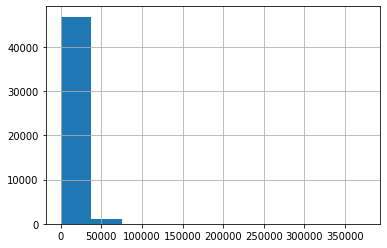

In [91]:
df['price'].hist()

As per the histogram, there are clearly extremes in the top range that need to be removed. As these extreme cases are not representative of our entire population of cars, it wouldn't make sense to find insights using these. Hence, they should be removed. For now, we will add the outliers into an outlier dataframe.

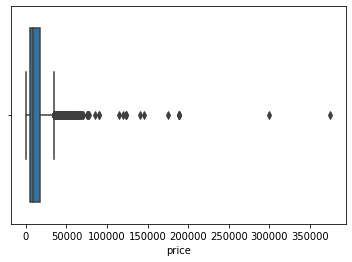

In [92]:
sns.boxplot(x=df['price'])

In [93]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
print('Q1: ', Q1)
print('Q3: ', Q3)
print('IQR: ', IQR)

Q1:  5000.0
Q3:  16900.0
IQR:  11900.0


In [94]:
bottom_cutoff = Q1 - (1.5*IQR)
top_cutoff = Q3 + 1.5 * IQR
if bottom_cutoff < 0:
    bottom_cutoff = 0
print('min: ',bottom_cutoff)
print('max: ',top_cutoff)

min:  0
max:  34750.0


In [95]:
price_outliers = df.loc[(df['price'] < bottom_cutoff) | (df['price'] > top_cutoff)]
len(price_outliers)

1546

In [96]:
#collect all outliers
outliers = price_outliers.copy()

In [97]:
len(price_outliers) / len(df)

0.03227153174967645

We isolated outliers based on IQR (sticking to a traditional min/max in a boxplot). About 3 % of the data includes outliers for price. We should not consider these in analysis

#### Vehicle Age

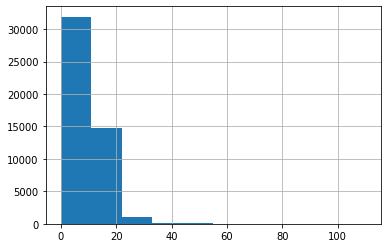

In [98]:
df['vehicle_age'].hist()

As per the histogram, there are clearly extremes in the top range that need to be removed. As these extreme cases are not representative of our entire population of cars, it wouldn't make sense to find insights using these. Hence, they should be removed. For now, we will add the outliers into an outlier dataframe.

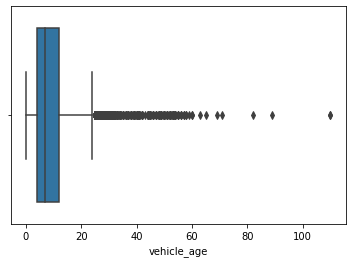

In [99]:
sns.boxplot(x=df['vehicle_age'])

In [100]:
Q1 = df['vehicle_age'].quantile(0.25)
Q3 = df['vehicle_age'].quantile(0.75)
IQR = Q3 - Q1
print('Q1: ', Q1)
print('Q3: ', Q3)
print('IQR: ', IQR)

Q1:  4.0
Q3:  12.0
IQR:  8.0


In [101]:
bottom_cutoff = Q1 - (1.5*IQR)
top_cutoff = Q3 + 1.5 * IQR
if bottom_cutoff < 0:
    bottom_cutoff = 0
print('min: ',bottom_cutoff)
print('max: ',top_cutoff)

min:  0
max:  24.0


In [102]:
vehicle_age_outliers = df.loc[(df['vehicle_age'] < bottom_cutoff) | (df['vehicle_age'] > top_cutoff)]
len(vehicle_age_outliers)

737

In [103]:
len(vehicle_age_outliers) / len(df)

0.015384294242892331

Using the same IQR methodology, we isolated outliers. A little over 1% of the data includes outliers for vehicle age. We should not consider these in analysis.

#### Average Miles Per Year

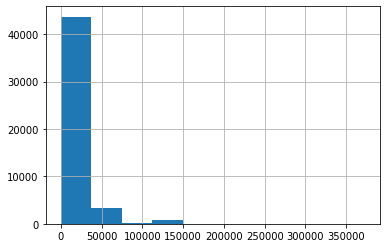

In [104]:
df['avg_miles_per_year'].hist()

As per the histogram, there are clearly extremes in the top range that need to be removed as they are not representative of our car population.

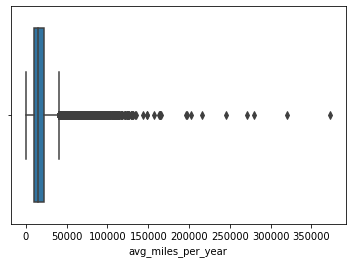

In [105]:
sns.boxplot(x=df['avg_miles_per_year'])

In [106]:
Q1 = df['avg_miles_per_year'].quantile(0.25)
Q3 = df['avg_miles_per_year'].quantile(0.75)
IQR = Q3 - Q1
print('Q1: ', Q1)
print('Q3: ', Q3)
print('IQR: ', IQR)

Q1:  10316.316666666668
Q3:  22428.571428571428
IQR:  12112.25476190476


In [107]:
bottom_cutoff = Q1 - (1.5*IQR)
top_cutoff = Q3 + 1.5 * IQR
if bottom_cutoff < 0:
    bottom_cutoff = 0
print('min: ',bottom_cutoff)
print('max: ',top_cutoff)

min:  0
max:  40596.95357142857


In [108]:
miles_outliers = df.loc[(df['avg_miles_per_year'] < bottom_cutoff) | (df['avg_miles_per_year'] > top_cutoff)]
len(miles_outliers)

3214

In [109]:
len(miles_outliers) / len(df)

0.06708971736316954

Using the same IQR methodology, we isolated outliers. Almost 7% of the data includes outliers based on average miles per year. We should not consider these in analysis.

#### Cylinders

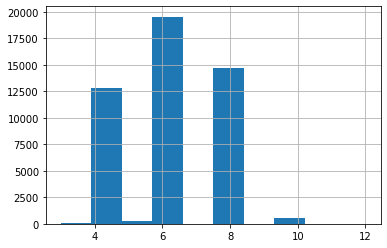

In [110]:
df['cylinders'].hist()

As per this histogram, there doesn't seem to be any significant outliers based on the numbers of cylinders

In [111]:
df['cylinders'].median()

6.0

In [112]:
df['cylinders'].mean()

6.113367845363838

After calculating mean and median, we can see that the average is very close to the median which is an indication that there arent significant outliers skewing the data

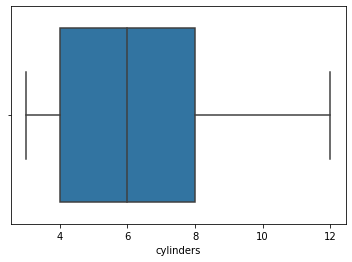

In [113]:
sns.boxplot(x=df['cylinders'])

In [114]:
Q1 = df['cylinders'].quantile(0.25)
Q3 = df['cylinders'].quantile(0.75)
IQR = Q3 - Q1
print('Q1: ', Q1)
print('Q3: ', Q3)
print('IQR: ', IQR)

Q1:  4.0
Q3:  8.0
IQR:  4.0


In [115]:
bottom_cutoff = Q1 - (1.5*IQR)
top_cutoff = Q3 + 1.5 * IQR
if bottom_cutoff < 0:
    bottom_cutoff = 0
print('min: ',bottom_cutoff)
print('max: ',top_cutoff)

min:  0
max:  14.0


In [116]:
# This is expected to be 0 if our inclination of no outliers is True
cylinders_outliers = df.loc[(df['cylinders'] < bottom_cutoff) | (df['cylinders'] > top_cutoff)]
len(cylinders_outliers)

0

As we have confirmed via multiple methods, there aren't any outlier values for "cylinders"

#### Condition

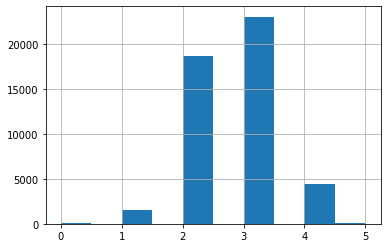

In [117]:
df['condition'].hist()

As per this histogram, there doesn't seem to be any significant outliers based on the numbers of cylinders

In [118]:
df['condition'].median()

3.0

In [119]:
df['condition'].mean()

2.6386047676700204

After calculating mean and median, we can see thatthe average is close. However... as the range of values is small 0-5, the 0.37 difference although seemingly small could mean there are outliers.

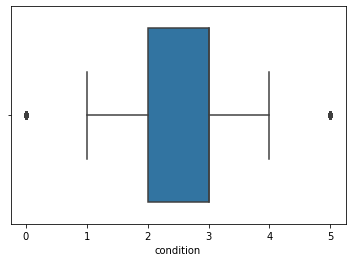

In [120]:
sns.boxplot(x=df['condition'])

In [121]:
Q1 = df['condition'].quantile(0.25)
Q3 = df['condition'].quantile(0.75)
IQR = Q3 - Q1
print('Q1: ', Q1)
print('Q3: ', Q3)
print('IQR: ', IQR)

Q1:  2.0
Q3:  3.0
IQR:  1.0


In [122]:
bottom_cutoff = Q1 - (1.5*IQR)
top_cutoff = Q3 + 1.5 * IQR
if bottom_cutoff < 0:
    bottom_cutoff = 0
print('min: ',bottom_cutoff)
print('max: ',top_cutoff)

min:  0.5
max:  4.5


In [123]:
condition_outliers = df.loc[(df['condition'] < bottom_cutoff) | (df['condition'] > top_cutoff)]
len(condition_outliers)

236

In [124]:
len(condition_outliers) / len(df)

0.0049263140316453055

Using the same IQR methodology, we isolated outliers. Less than 0.5% of the data includes outliers for condition. We should not consider these in analysis.

#### Removing outliers

In [125]:
print('Outliers by Variable')
print()
print('Price: ', len(price_outliers))
print('Vehicle Age at posting time: ', len(vehicle_age_outliers))
print('Average Miles Per Year: ', len(miles_outliers))
print('Number of Cylinders: ', len(cylinders_outliers))
print('Condition: ', len(condition_outliers))

Outliers by Variable

Price:  1546
Vehicle Age at posting time:  737
Average Miles Per Year:  3214
Number of Cylinders:  0
Condition:  236


In [126]:
outliers = pd.concat([price_outliers, vehicle_age_outliers, miles_outliers, cylinders_outliers, condition_outliers])
outliers.drop_duplicates(inplace=True)
len(outliers)

5277

In [127]:
len(outliers) / len(df)

0.11015321671606897

Records that represent outliers make up 10% of the dataset. Now let's filter dataset to remove outliers

In [128]:
df = df[~df.index.isin(outliers.index)]

In [129]:
len(df) / len(df_with_outliers)

0.8898467832839311

In [130]:
len(df) / original_len

0.827345948568656

After preprocessing and removing outliers we have kept about **83% of the original dataset**. 

Text(0.5, 1.0, 'Price without outliers')

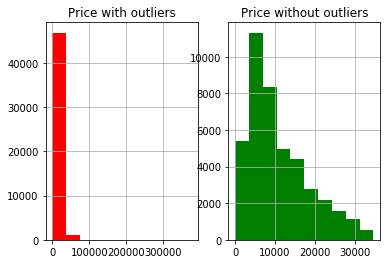

In [131]:
#Price
fig, axes = plt.subplots(1, 2)
df_with_outliers['price'].hist(ax=axes[0], color = 'red')
df['price'].hist(ax=axes[1], color='green')

axes[0].set_title('Price with outliers')
axes[1].set_title('Price without outliers')

Now that outliers are removed, we can now really understand what variables are correlated to price.

Text(0.5, 1.0, 'Vehicle Age without outliers')

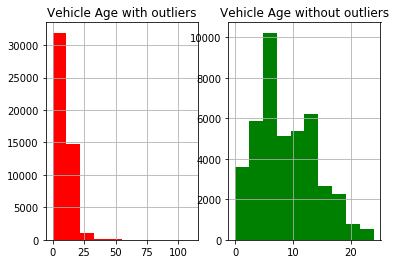

In [132]:
#Vehicle Age
fig, axes = plt.subplots(1, 2)
df_with_outliers['vehicle_age'].hist(ax=axes[0], color='red')
df['vehicle_age'].hist(ax=axes[1], color='green')

axes[0].set_title('Vehicle Age with outliers')
axes[1].set_title('Vehicle Age without outliers')

We see that some very old / antique cars whose pricing scheme is probably unique. Now that they are removed we can focus on cars with a more common age

Text(0.5, 1.0, 'Miles/Year without outliers')

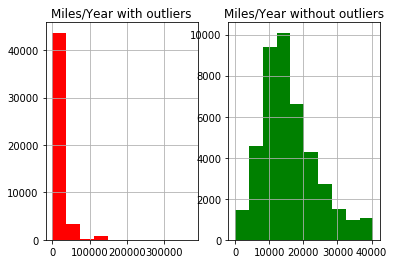

In [133]:
#Mileage
fig, axes = plt.subplots(1, 2)
df_with_outliers['avg_miles_per_year'].hist(ax=axes[0], color='red')
df['avg_miles_per_year'].hist(ax=axes[1], color='green')

axes[0].set_title('Miles/Year with outliers')
axes[1].set_title('Miles/Year without outliers')

There were some cars that had extreme (some would say phenomenal or probably erroneous) very large mileage. As how much a car has been driven should have an impact on price. We can more confidently use this data now that these extreme cars were removed. 

Text(0.5, 1.0, '# Cylinders without outliers')

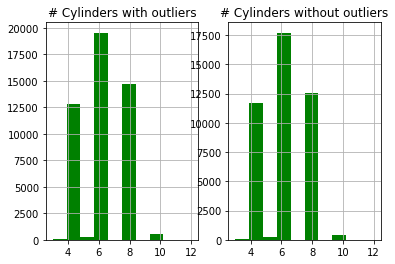

In [134]:
#Cylinders
fig, axes = plt.subplots(1, 2)
df_with_outliers['cylinders'].hist(ax=axes[0], color='green')
df['cylinders'].hist(ax=axes[1], color='green')

axes[0].set_title('# Cylinders with outliers')
axes[1].set_title('# Cylinders without outliers')

Note - As there weren't any outliers, there should be exactly the same

Text(0.5, 1.0, 'Condition without outliers')

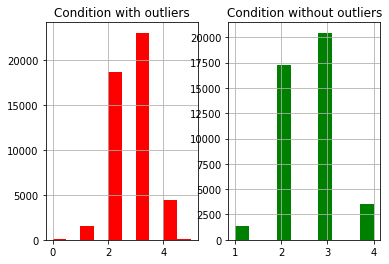

In [135]:
#Condition
fig, axes = plt.subplots(1, 2)
df_with_outliers['condition'].hist(ax=axes[0], color='red')
df['condition'].hist(ax=axes[1], color='green')

axes[0].set_title('Condition with outliers')
axes[1].set_title('Condition without outliers')

Condition should have a connection with price and we ended up removing cars that were considered salvage which makes a lot of sense as the pricing of these doesn't represent the expected prices of actually working cars

### Days Listed

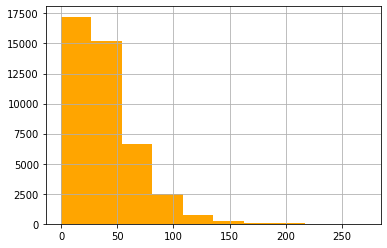

In [136]:
df['days_listed'].hist(color='orange')

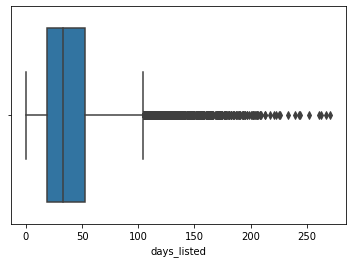

In [137]:
sns.boxplot(x=df['days_listed'])

In [138]:
df['days_listed'].mean()

39.577752234394424

In [139]:
df['days_listed'].median()

33.0

In [140]:
df['days_listed'].max()

271

In [141]:
df['days_listed'].quantile(0.25)

19.0

In [142]:
df['days_listed'].quantile(0.75)

53.0

In [143]:
df.groupby('month_posted')['days_listed'].median()

month_posted
1     33
2     34
3     34
4     34
5     33
6     34
7     33
8     33
9     33
10    33
11    33
12    33
Name: days_listed, dtype: int64

In [144]:
df.groupby('condition')['days_listed'].median()

condition
1    33
2    33
3    33
4    33
Name: days_listed, dtype: int64

In [145]:
df.groupby('manufacturer')['days_listed'].median()

manufacturer
acura         33.5
bmw           34.0
buick         33.0
cadillac      34.0
chevrolet     33.0
chrysler      31.0
dodge         33.0
ford          33.0
gmc           34.0
honda         33.0
hyundai       33.0
jeep          33.0
kia           36.0
nissan        32.0
ram           33.0
subaru        33.0
toyota        33.0
volkswagen    32.0
Name: days_listed, dtype: float64

Half of our ads are listed for less than 33 days with a quarter last 19 days. This pattern seems to hold up regardless of which month the ad is posted, condition, or manufacturer. A quarter of our ads are listed over 53 days with one even reaching 271 days. We should consider checking what affects how long a car is posted but this is out of scope for this project.

### Number of Ads

In [146]:
original_len

51525

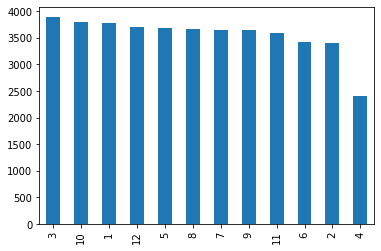

In [147]:
df['month_posted'].value_counts().plot(kind='bar')

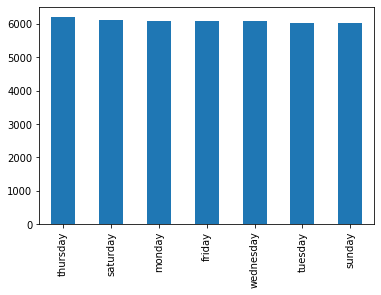

In [148]:
df['dow_posted'].value_counts().plot(kind='bar')

During this time period, we have had a consistent number of ads placed. The number of ads posted is about the same regardless of month or day of week (note - We don't have data for the full month of April). 

### Vehicle Type

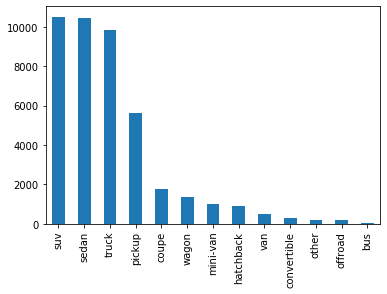

In [149]:
df['type'].value_counts().plot(kind='bar')

In [150]:
df['type'].nunique()

13

In [151]:
df['type'].value_counts(normalize=True)

suv            0.246475
sedan          0.244857
truck          0.230219
pickup         0.131483
coupe          0.041990
wagon          0.032161
mini-van       0.023388
hatchback      0.020761
van            0.012034
convertible    0.007389
other          0.004692
offroad        0.004011
bus            0.000540
Name: type, dtype: float64

In [152]:
0.24+0.24+0.23+0.13

0.84

We are much more successful with certain types of vehicles than others.  Despite having 13 different types of vehicles in the platform. 84% of our vehicles are either an SUV, sedan, truck, or pickup. Our top 2 types of vehicle are SUV and Sedan.

This could mean either two things:
* We are stronger with some types than others and can use this as an opportunity to either specilize or go after the market share of the remaning 9 types. 
* We should re-evaluate the types we have available for customers to choose from as some of these categories may be subjective. 

In [153]:
df.groupby('type')['price'].mean().sort_values(ascending=False)

type
bus            17445.913043
truck          14454.139596
pickup         14362.471008
offroad        13867.643275
coupe          12876.284358
convertible    12642.730159
suv            10084.579328
other           9599.690000
wagon           8671.040117
van             8150.434698
mini-van        7555.826479
sedan           6676.290477
hatchback       6550.489266
Name: price, dtype: float64

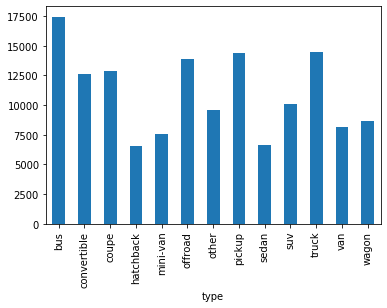

In [154]:
df.groupby('type')['price'].mean().plot(kind='bar')

In [155]:
df.groupby('type')['days_listed'].median().sort_values()

type
convertible    31
other          31
offroad        32
coupe          33
mini-van       33
pickup         33
sedan          33
truck          33
van            33
suv            34
wagon          35
hatchback      36
bus            40
Name: days_listed, dtype: int64

Yes, trucks and picksups which have the 2nd and 3rd largest price are our most popular listings despite having higher average prices and listed an expected number of days. 

But we find out something interested about other areas. We have the least number of buses but they are also the highest prices and stay int he platform the lngest. We should access our strategy with this vehicle type. 

Although convertibles make up less than 1% of our listings and are priced around the middle, they are listed in the platform for the least amount of days (hopefully indicating they get purchased the quickest. This could be a great area of opportunity for our business.

### What factors impact price the most? 

##### SUV

In [156]:
suv = df.loc[df['type']=='suv']

In [157]:
suv.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year_posted,month_posted,vehicle_age,avg_miles_per_year
price,1.000000,0.600332,0.259330,0.007522,-0.479539,0.124241,-0.019799,0.012734,-0.016070,-0.598276,0.336118
model_year,0.600332,1.000000,0.321588,-0.247954,-0.578786,-0.070487,-0.014661,0.031803,-0.032934,-0.995581,0.598776
condition,0.259330,0.321588,1.000000,-0.089603,-0.306914,-0.008166,-0.012952,0.004904,-0.004748,-0.320667,0.085353
cylinders,0.007522,-0.247954,-0.089603,1.000000,0.206243,0.111758,0.012296,-0.006408,0.001118,0.246997,-0.104837
odometer,-0.479539,-0.578786,-0.306914,0.206243,1.000000,0.023675,0.011948,-0.014237,0.016367,0.576620,0.107964
is_4wd,0.124241,-0.070487,-0.008166,0.111758,0.023675,1.000000,-0.006682,-0.007682,0.004334,0.069665,-0.035187
days_listed,-0.019799,-0.014661,-0.012952,0.012296,0.011948,-0.006682,1.000000,-0.000779,-0.003876,0.014567,-0.008232
year_posted,0.012734,0.031803,0.004904,-0.006408,-0.014237,-0.007682,-0.000779,1.000000,-0.820377,0.062200,-0.113107
month_posted,-0.016070,-0.032934,-0.004748,0.001118,0.016367,0.004334,-0.003876,-0.820377,1.000000,-0.044194,0.089862
vehicle_age,-0.598276,-0.995581,-0.320667,0.246997,0.576620,0.069665,0.014567,0.062200,-0.044194,1.000000,-0.608546


In [158]:
#age - scatter

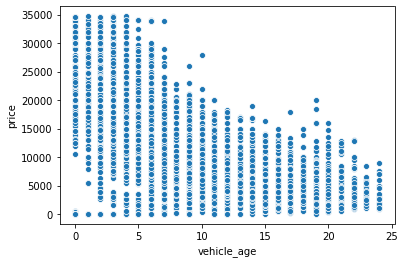

In [159]:
sns.scatterplot(data=suv, x="vehicle_age", y="price")

Among SUVs, there is a negative relationship between price and vehicle age. The newer the vehicle the higher the price. Logically, the older the vehicle, the lower the price.

In [160]:
#mileage - scatte

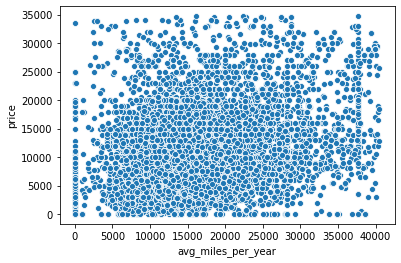

In [161]:
sns.scatterplot(data=suv, x="avg_miles_per_year", y="price")

Among SUVs, there actually doesn't seem to be an evident strong correlation between average miles per year and price. Interestingly, I expected cars with 0 mileage to have the highest price but that is not the case.

In [162]:
#condition - scatter

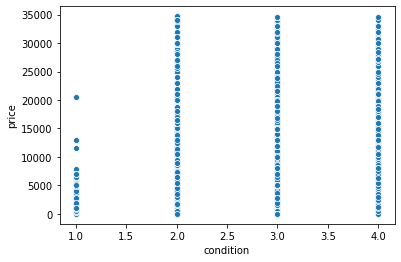

In [163]:
sns.scatterplot(data=suv, x="condition", y="price")

Among SUVs, there is a positive correlation between price and condition. As the condition improves (with the peak being "new"), price increases

In [164]:
#transmission type - box (remove categories with less than 50 ads)

In [165]:
suv['transmission'].value_counts()

automatic    9953
manual        423
other         131
Name: transmission, dtype: int64

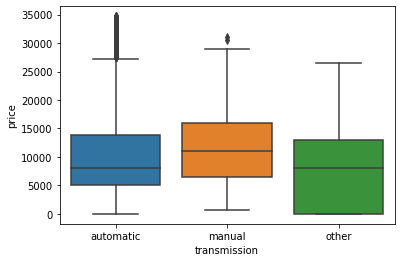

In [166]:
sns.boxplot(x="transmission", y="price", data=suv)

Among SUVs, there seems to be a corelation between price and transmission type. We can see that vehicles with manual transmissonw have a higher price than vehicles with automatic. Further research would be required to understand what is in "other" that yields the lowest price

In [167]:
#color - box (remove categories with less than 50 ads)

In [168]:
suv['paint_color'].value_counts()

unknown    1894
black      1842
white      1615
silver     1347
grey       1014
blue        889
red         793
green       383
brown       323
custom      270
orange       63
yellow       38
purple       36
Name: paint_color, dtype: int64

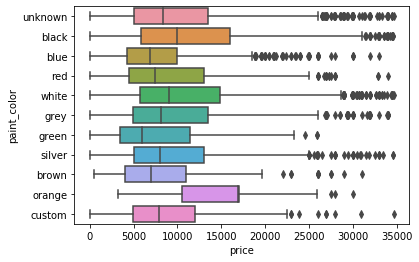

In [169]:
#Remove yellow and purple before plotting (less than 50 ads)
paint_suv = suv.loc[~(suv['paint_color'].isin(['yellow','purple']))]
g = sns.boxplot(x="price", y="paint_color", data=paint_suv)

Among SUVs, we can see from this plot that for the most part there isn't a correlation between paint colot and price with a few exceptions. Black vehicles cover the widest range of prices (unsursprisingly) . Orange also has a higher price. From personal observation, this is not not a common color so further research would be needed to understand the reason. Are orange vehicles used for a particular reason (e.g. for-hire vehicles)?

##### Sedan

In [170]:
sedan = df.loc[df['type']=='sedan']

In [171]:
sedan.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year_posted,month_posted,vehicle_age,avg_miles_per_year
price,1.000000,0.635104,0.291259,-0.022393,-0.532158,0.065002,0.002317,0.041688,-0.046327,-0.630678,0.257879
model_year,0.635104,1.000000,0.305042,-0.105759,-0.581240,0.073589,-0.002681,0.049505,-0.049577,-0.994694,0.544760
condition,0.291259,0.305042,1.000000,-0.038964,-0.317135,0.020943,-0.008469,0.012988,-0.008071,-0.303641,0.064384
cylinders,-0.022393,-0.105759,-0.038964,1.000000,0.054727,0.181855,0.004272,0.001710,-0.002099,0.105913,-0.071168
odometer,-0.532158,-0.581240,-0.317135,0.054727,1.000000,-0.053922,0.008682,-0.015351,0.021523,0.579539,0.171529
is_4wd,0.065002,0.073589,0.020943,0.181855,-0.053922,1.000000,0.011150,-0.005901,0.011336,-0.074182,0.033806
days_listed,0.002317,-0.002681,-0.008469,0.004272,0.008682,0.011150,1.000000,0.015001,-0.011198,0.004226,0.000938
year_posted,0.041688,0.049505,0.012988,0.001710,-0.015351,-0.005901,0.015001,1.000000,-0.822160,0.053510,-0.098461
month_posted,-0.046327,-0.049577,-0.008071,-0.002099,0.021523,0.011336,-0.011198,-0.822160,1.000000,-0.035119,0.079919
vehicle_age,-0.630678,-0.994694,-0.303641,0.105913,0.579539,-0.074182,0.004226,0.053510,-0.035119,1.000000,-0.554789


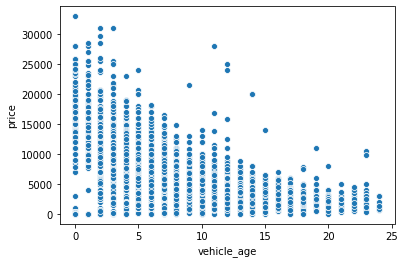

In [172]:
sns.scatterplot(data=sedan, x="vehicle_age", y="price")

Just like SUVs, there is a negative relationship between price and vehicle age among sedans. The older the vehicle the lower the price. The newer the vehicle the higher the price

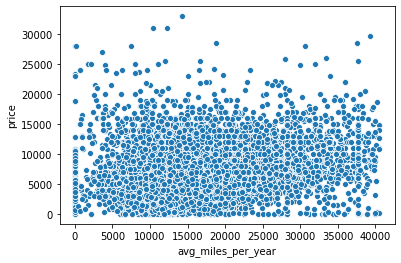

In [173]:
sns.scatterplot(data=sedan, x="avg_miles_per_year", y="price")

Like SUVs, there doesnt seem to be a strong correlation between mileage and price

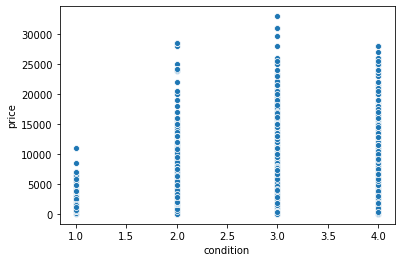

In [174]:
sns.scatterplot(data=sedan, x="condition", y="price")

Like SUVs, there is a positive correlation between price and the condition of the vehicle. The better the condition, the higher the price and vice-versa. 

In [175]:
#all options above 50?
sedan['transmission'].value_counts()

automatic    9808
manual        528
other         102
Name: transmission, dtype: int64

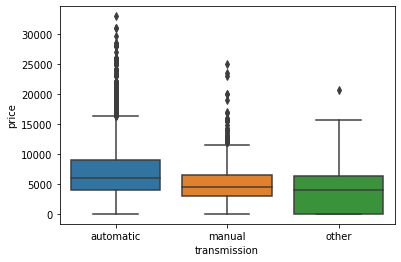

In [176]:
sns.boxplot(x="transmission", y="price", data=sedan)

Interestingly, sedans don't follow the same price pattern as SUVs in relation to transmission types.THe prices between automatic and manual seem closer and automatic actually have higher prices. The category "other" is again the cheapest one. More research should be done to understand that category.

In [177]:
sedan['paint_color'].value_counts()

unknown    1864
silver     1774
black      1520
grey       1378
white      1298
blue       1075
red         827
custom      241
brown       230
green       178
purple       25
yellow       20
orange        8
Name: paint_color, dtype: int64

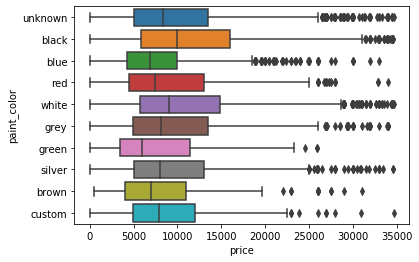

In [178]:
paint_sedan = suv.loc[~(suv['paint_color'].isin(['yellow','purple','orange']))]
sns.boxplot(x="price", y="paint_color", data=paint_sedan)

As with SUVs, there doesn seem to be a strong correlation between pain color and price. The only thing to notice is that colors with the widest range of prices in order are black, white, and silver unsuprisingly. 

### Conclusion

In this EDA step, we have uncovered some insights that can be useful for this business and explored potential connections that were only visible upon plotting the data. We also explored the importance of removing outliers that are not representative of your data and their effect.

### Step 5. Overall conclusion

The main objective of this project is to discover what factors affect a vehicle's price. During the process we uncovered additional insights related to activity of the site and inventory. Below are the findings: 

**Activity on the Site**
- Activity is consistent, with the number of ads and the days a car is listed remaining around the same month after month. 

**Inventory**
- Although we have 13 different types of vehicles in our site. 84% of the inventory is of 4 types (SUV, sedan, truck, and pickup). Is this what the business intended? Do we want to focus on these or diversify our inventory?
- Buses are a particular weak area for us making up less than 1% of our inventory, with a high price, and listed the longsest. 
- Convertible seem to be an emerging type for us thanks to being listed for the shortest amount of type (assumingly a sign of demand) while making less than 1% of our inventory. 

**Price**
- After a closer look at our two most popular vehicle types, we have found factors that impact price:
- Vehicle Age: Newer vehicles are more expensive than older ones
- Condition - As condition improves so does price. 
- Transmission Type: Depending on the vehicle type we can see that certain transmission types are more expensive. For example, SUVs with a manual transmission are more expensive thatn automatic (perhaps related to supply). 


*Of notice is that the average miles per year did not have the effect of price that was expected and paint color did not affect price either.*


### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn